In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [29]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = iris.target

In [31]:
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])

In [27]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [32]:
df.shape

(150, 6)

In [33]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [34]:
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [35]:
df[df.target == 2 ].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [36]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

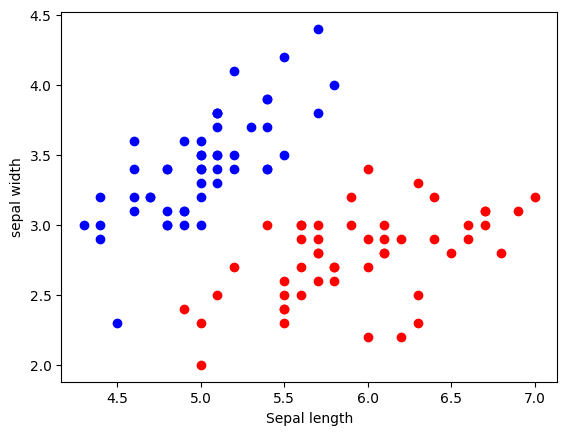

In [37]:
%matplotlib inline

plt.xlabel('Sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color= 'blue')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color= 'red')


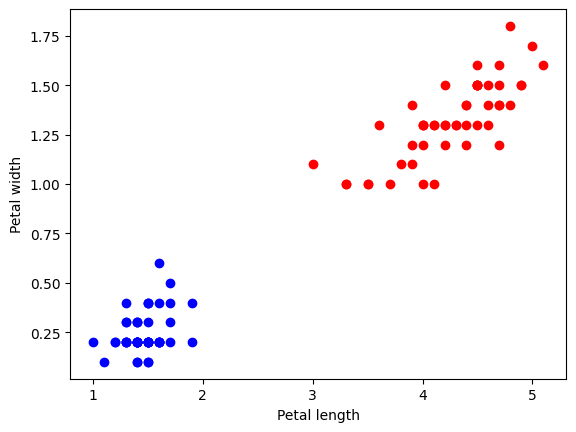

In [38]:

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color= 'blue')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color= 'red')


In [46]:
from sklearn.model_selection import train_test_split
X=df.drop(['target','flower_names'],axis = 'columns')
Y = df.target
X_train , X_test ,Y_train , Y_test = train_test_split(X,Y,test_size = 0.2)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)

In [48]:
model.fit(X_train,Y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [49]:
model.score(X_test,Y_test)

1.0

In [51]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test,y_pred)
cm

array([[12,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  9]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

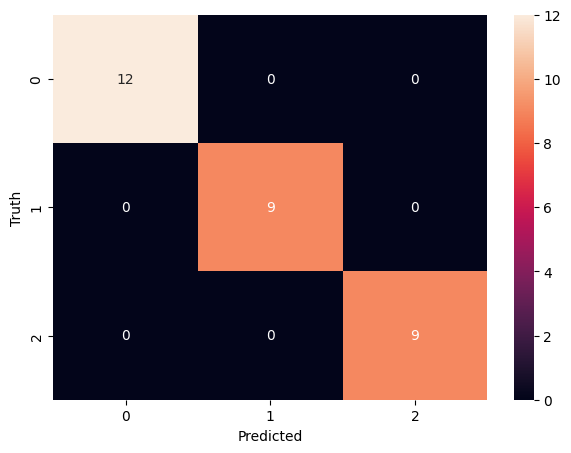

In [52]:
%matplotlib inline
import seaborn as sns

plt.figure(figsize =(7,5))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')